In [2]:
import numpy as np
import pandas as pd
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../data/combinedData.csv')
target = pd.read_csv('../data/combinedTarget.csv')

data = data.merge(target, how='left',on=['Provider','Set'])
data.drop(columns = ['Unnamed: 0_x','Unnamed: 0_y'], inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,13,14,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Warmup Question 4:
- Study the distributions of **InscClaimAmtReimbursed**, **DeductibleAmtPaid** 
for both inpatient and outpatient services. Your team might want to work with hist, scatter or sns.pairplot, distplot, etc.

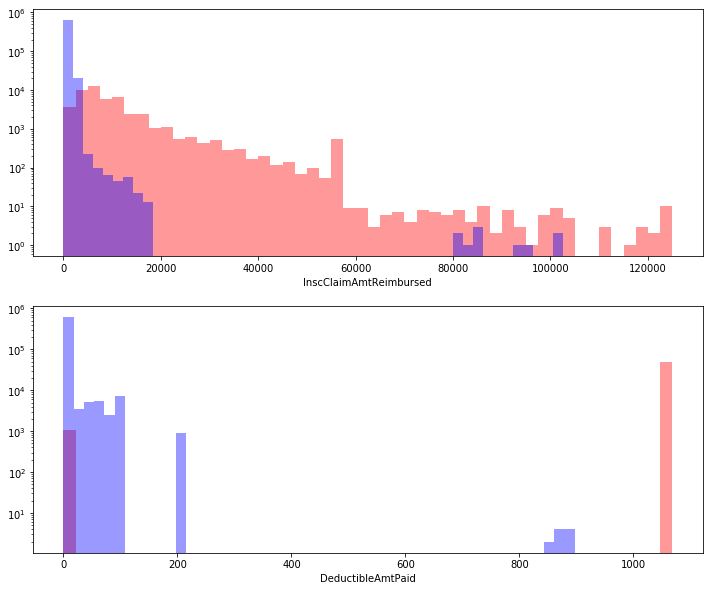

In [3]:
plt.figure(figsize=(12,10))
plt.subplot(211)
sns.distplot(a= data[data.Status=='in']['InscClaimAmtReimbursed'], kde=False, color = 'red')
sns.distplot(a= data[data.Status=='out']['InscClaimAmtReimbursed'], kde=False, color = 'blue')
plt.yscale('log')

plt.subplot(212)
sns.distplot(a= data[data.Status=='in']['DeductibleAmtPaid'], kde=False, color = 'red')
sns.distplot(a= data[data.Status=='out']['DeductibleAmtPaid'], kde=False, color = 'blue')
plt.yscale('log')

- Study the distributions of 
insurance covered percentages **InscClaimAmtReimbursed/(InscClaimAmtReimbursed+DeductibleAmtPaid)**.

In [4]:
data['InscCovPerc'] = data['InscClaimAmtReimbursed']/(data['InscClaimAmtReimbursed']+data['DeductibleAmtPaid'])

In [5]:
x = data.copy()
x.fillna(0, inplace=True)

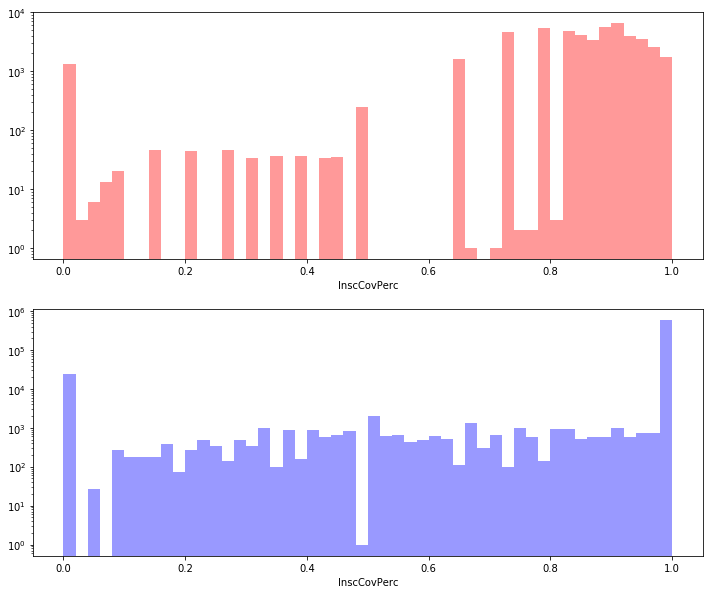

In [6]:
plt.figure(figsize=(12,10))


plt.subplot(211)
sns.distplot(a= x[x.Status=='in']['InscCovPerc'], kde=False, color = 'red')
plt.yscale('log')

plt.subplot(212)
sns.distplot(a= x[x.Status=='out']['InscCovPerc'], kde=False, color = 'blue')
plt.yscale('log')



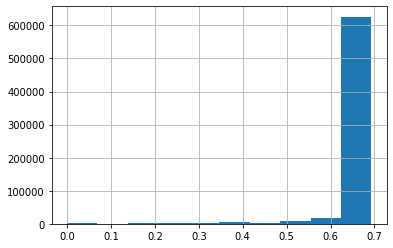

In [7]:
np.log(data['InscCovPerc']+1).hist()

- Study the distributions of the durations of average insurance claims (end-start) of the providers? 
Box-plot/violin-plot based on the **PotentialFraud** flag. Do you find any differences for none-potential fraud vs potential-fraud
providers?

In [8]:
df = data.groupby(['Provider','PotentialFraud','Status'])['ClaimDays'].mean().reset_index()

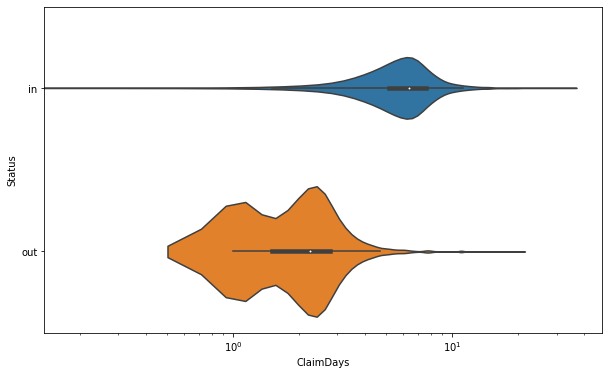

In [11]:
plt.figure(figsize=(10,6))


# plt.subplot(211)
# sns.boxplot(x = 'PotentialFraud', y = 'ClaimDays', data=df)
# plt.yscale('log')

# plt.subplot(212)

ax2 = sns.violinplot(y = 'Status', x = 'ClaimDays', data=df)
plt.xscale('log')
ax2.figure.savefig("../visualizations/aiko/inout_ClaimDays.png",bbox_inches='tight')

- How are the service durations related to the total claim amounts, i.e. InscClaimAmtReimbursed+DeductibleAmtPaid?

In [69]:
data['TotalClaim'] = data['InscClaimAmtReimbursed'] + data['DeductibleAmtPaid']

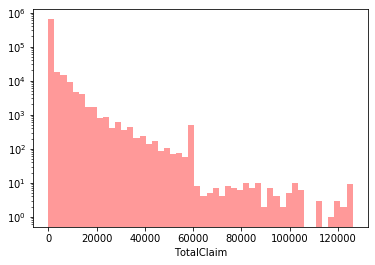

In [73]:
sns.distplot(a= data['TotalClaim'].fillna(0), kde=False, color = 'red')
plt.yscale('log')


In [111]:
inpat = data[data.Status=='in']
outpat = data[data.Status=='out']

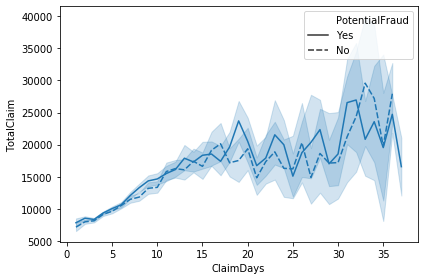

In [109]:
sns.lineplot(x = 'ClaimDays', y = 'TotalClaim', style = 'PotentialFraud', data = inpat[inpat.PotentialFraud != '?'])
plt.tight_layout()


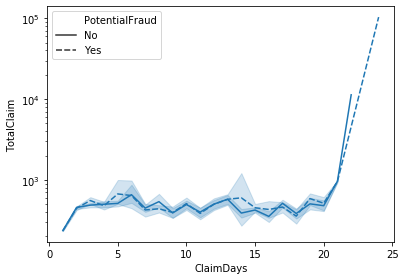

In [114]:
sns.lineplot(x = 'ClaimDays', y = 'TotalClaim', style = 'PotentialFraud', data = outpat[outpat.PotentialFraud != '?'])
plt.tight_layout()
plt.yscale('log')

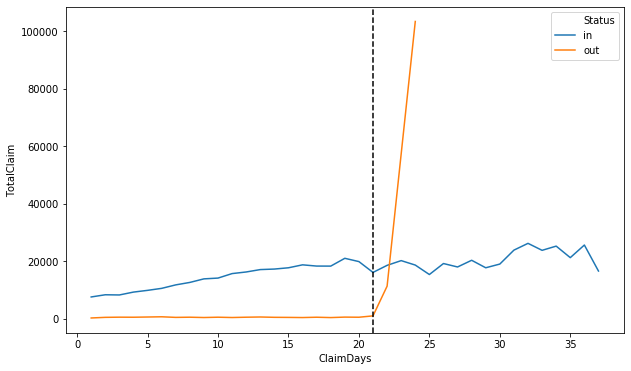

In [24]:
plt.figure(figsize=(10,6))

df = data[data.PotentialFraud != '?'].groupby(['ClaimDays','Status'])['TotalClaim'].mean().reset_index()
ax2 = sns.lineplot(x = 'ClaimDays', y = 'TotalClaim', hue = 'Status', data = df)

plt.axvline(x = 21, linestyle='--', color = 'black')
ax2.figure.savefig("../visualizations/aiko/totalClaim_inout_ClaimDays.png",bbox_inches='tight')

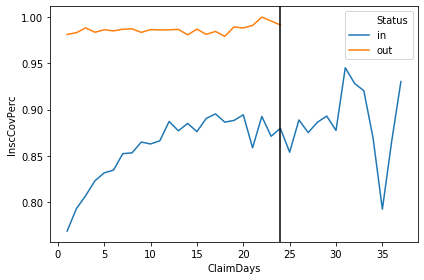

In [41]:
ax2 = sns.lineplot(x = 'ClaimDays', y = 'InscCovPerc', hue='Status',
             data = data[data.PotentialFraud != '?'].groupby(['ClaimDays','Status'])['InscCovPerc'].mean().reset_index())

plt.axvline(x=24,color = 'black')
plt.tight_layout()

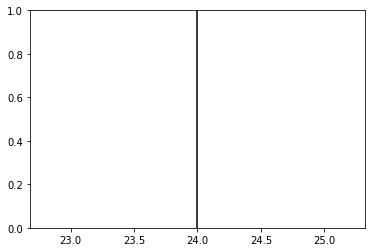

In [37]:
plt.axvline(x=24, color = 'black')

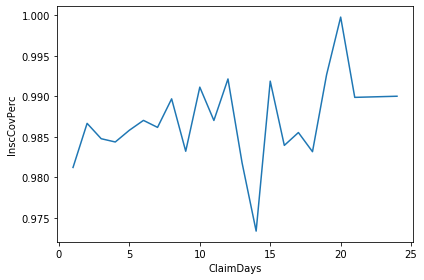

In [35]:
ax2 = sns.lineplot(x = 'ClaimDays', y = 'InscCovPerc',
             data = data.query('PotentialFraud==\'?\' & Status==\'out\'').groupby(['ClaimDays'])['InscCovPerc'].mean().reset_index())
plt.tight_layout()

- Consider mean daily total charges (i.e. total charge/duration), please describe their distribution.
How do the **Potential Fraud** flag affect the distribution patterns?